# Used Cars Dataset Analysis


To Start with I wll be importing the necessary modules and read the csv file


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

dt=pd.read_csv('../input/cars4u/used_cars_data.csv')
dt.head(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [2]:
%matplotlib inline

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


The Data consists of several object types which could be converted to float types to hwlp contribute to the analysis.
the Data also consists of several null values which we can process during the data cleaning steps.

## Data Cleaning


1>To clean cells like Mileage engine etc we have to delete the scripts appearing after the numerical values and convert it to float data type.<br>
2>We have to transform Categorical features using onehotencoder or label encoder to numerical features.<br>
3>All of the former is done in the cells below:


In [4]:
dt['Mileage'] = dt['Mileage'].map(lambda x: str(x).rstrip(' km/plkm/kg'))
dt['Mileage']=dt['Mileage'].astype(str).astype(float)
dt['Engine'] = dt['Engine'].map(lambda x: str(x).rstrip('  CC'))
dt['Engine']=dt['Engine'].astype(str).astype(float)

dt['Power'] = dt['Power'].map(lambda x: str(x).strip('null bhpa'))
dt.replace("",np.NaN,inplace=True)
dt['Power']=dt['Power'].astype(str).astype(float)
dt.drop(["New_Price"],axis=1,inplace=True)

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(dt[["Location"]]))
OH_cols_train.columns=OH_encoder.get_feature_names(["Location"])
dt = dt.drop(["Location"], axis=1)
dt = pd.concat([dt, OH_cols_train], axis=1)
label_encoder=LabelEncoder()
dt["Fuel_Type"] = label_encoder.fit_transform(dt["Fuel_Type"])
dt['Transmission']=label_encoder.fit_transform(dt["Transmission"])
dt["Owner_Type"]=label_encoder.fit_transform(dt["Owner_Type"])
dt_num = dt.drop("Name", axis=1)
imputer = SimpleImputer(strategy="median")
imputer.fit(dt_num)
X=imputer.transform(dt_num)
dt = pd.DataFrame(X, columns=dt_num.columns)


dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S.No.                7253 non-null   float64
 1   Year                 7253 non-null   float64
 2   Kilometers_Driven    7253 non-null   float64
 3   Fuel_Type            7253 non-null   float64
 4   Transmission         7253 non-null   float64
 5   Owner_Type           7253 non-null   float64
 6   Mileage              7253 non-null   float64
 7   Engine               7253 non-null   float64
 8   Power                7253 non-null   float64
 9   Seats                7253 non-null   float64
 10  Price                7253 non-null   float64
 11  Location_Ahmedabad   7253 non-null   float64
 12  Location_Bangalore   7253 non-null   float64
 13  Location_Chennai     7253 non-null   float64
 14  Location_Coimbatore  7253 non-null   float64
 15  Location_Delhi       7253 non-null   f

<hr><p1>Here we remove the new price column as it does not contain enough entries</p1><br>
<p1>We encoded location wiith the help of one hot encoder and the rest of the categorical variables with the help of the label encoder<p1><br>

# Preparing The data<br>
## Feature Engineering<br>

<p1> We try and convert the features Mileage Engine Power into a metric called Performance_measure</p1><br>


In [5]:

dt["Performance_measure"] = (dt["Mileage"]+dt["Engine"]+dt["Power"])/3
dt.drop(["Mileage","Engine","Power"],axis=1,inplace=True)


In [6]:

dt.drop(['S.No.'],axis=1,inplace=True)
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 7253 non-null   float64
 1   Kilometers_Driven    7253 non-null   float64
 2   Fuel_Type            7253 non-null   float64
 3   Transmission         7253 non-null   float64
 4   Owner_Type           7253 non-null   float64
 5   Seats                7253 non-null   float64
 6   Price                7253 non-null   float64
 7   Location_Ahmedabad   7253 non-null   float64
 8   Location_Bangalore   7253 non-null   float64
 9   Location_Chennai     7253 non-null   float64
 10  Location_Coimbatore  7253 non-null   float64
 11  Location_Delhi       7253 non-null   float64
 12  Location_Hyderabad   7253 non-null   float64
 13  Location_Jaipur      7253 non-null   float64
 14  Location_Kochi       7253 non-null   float64
 15  Location_Kolkata     7253 non-null   f

# Splitting The data<br>
<p1> Here we split the data using scikit-learn's train_test_split Function</p1>

In [7]:
X=dt.drop(["Price"],axis=1)
y=dt["Price"]

In [8]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(X,y,test_size=0.2,random_state=42)

# Visualisations 
<p1> Here are some analysis points with the help of visualisations</p1>

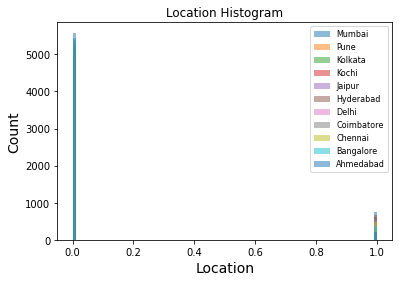

In [9]:
plt.hist(Xtrain["Location_Mumbai"],alpha=0.5,label="Mumbai",bins=100)
plt.hist(Xtrain["Location_Pune"], bins=100, alpha=0.5, label="Pune")
plt.hist(Xtrain["Location_Kolkata"], bins=100, alpha=0.5, label="Kolkata")
plt.hist(Xtrain["Location_Kochi"], bins=100, alpha=0.5, label="Kochi")
plt.hist(Xtrain["Location_Jaipur"], bins=100, alpha=0.5, label="Jaipur")
plt.hist(Xtrain["Location_Hyderabad"], bins=100, alpha=0.5, label="Hyderabad")
plt.hist(Xtrain["Location_Delhi"], bins=100, alpha=0.5, label="Delhi")
plt.hist(Xtrain["Location_Coimbatore"], bins=100, alpha=0.5, label="Coimbatore")
plt.hist(Xtrain["Location_Chennai"], bins=100, alpha=0.5, label="Chennai")
plt.hist(Xtrain["Location_Bangalore"], bins=100, alpha=0.5, label="Bangalore")
plt.hist(Xtrain["Location_Ahmedabad"], bins=100, alpha=0.5, label="Ahmedabad")
plt.xlabel("Location", size=14)
plt.ylabel("Count", size=14)
plt.title("Location Histogram")
plt.legend(loc=1, prop={"size":8})


Text(0, 0.5, 'Price')

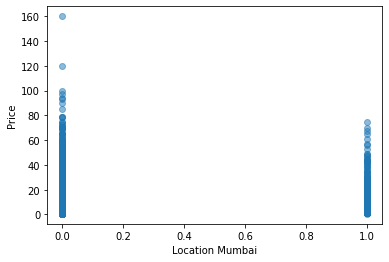

In [10]:
plt.scatter(Xtrain["Location_Mumbai"],ytrain,alpha=0.5)
plt.xlabel("Location Mumbai")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

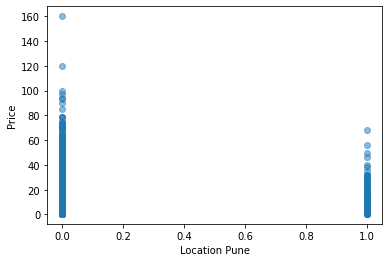

In [11]:
plt.scatter(Xtrain["Location_Pune"],ytrain,alpha=0.5)
plt.xlabel("Location Pune")
plt.ylabel("Price")

<p1>Inspecting the graphs Most Cars Are maufactured in Mumbai as shown in the histogram</p1><br>
<p1>One possible reason is The resale value of cars made in mumbai is much higher than the ones made in pune for example</p1>


Text(0.5, 1.0, 'Performance_measure V/s Year')

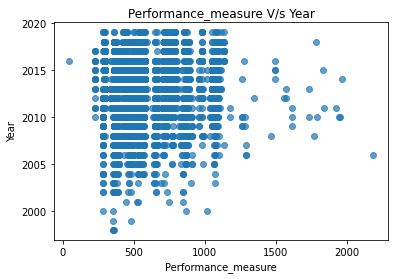

In [12]:
plt.scatter(Xtrain["Performance_measure"],Xtrain["Year"],alpha=0.7)
plt.xlabel("Performance_measure")
plt.ylabel("Year")
plt.title("Performance_measure V/s Year")

Text(0.5, 1.0, 'Year V/s Price')

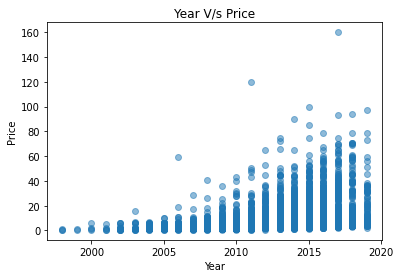

In [13]:
plt.scatter(Xtrain["Year"],ytrain,alpha=0.5)
plt.xlabel("Year")
plt.ylabel("Price")
plt.title("Year V/s Price")

<p1>As you can see it very clear from the graph above that The year of manufacture has a sustained impact on the resale value of the car</p><br>
<p1>The later the car was manufactured the higher the resale value</p1><br>
<p1>One reason for this could be that The later the car was manufactured the better the performance measure wasduring the time of sale as highlighed by the Perfomance measure V/s Year Graph</p1>


Text(0.5, 1.0, 'Seats v/s Price')

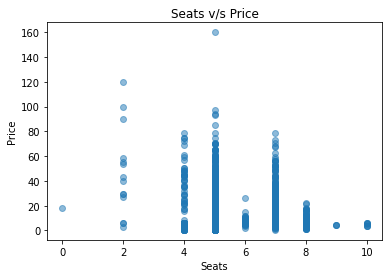

In [14]:
plt.scatter(Xtrain["Seats"],ytrain,alpha=0.5)
plt.xlabel("Seats")
plt.ylabel("Price")
plt.title("Seats v/s Price")

Text(0.5, 1.0, 'Histogram of Seats feature')

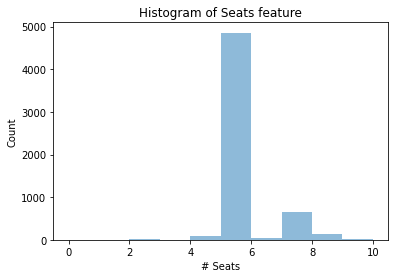

In [15]:
plt.hist(Xtrain["Seats"],alpha=0.5)
plt.xlabel("# Seats")
plt.ylabel("Count")
(plt.title("Histogram of Seats feature"))

<p1>The Two Graphs above display certain pecularities ie. They are distinctly similiar</p1><br>
<p1>This provides a link of the concrete relationship between number of seats manufactured and the resale value of cars with a certain number of seats</p1><br>
<p1>The car manufacturers are compelled to make 5 seater or 7 seater vehicles as people prefer those cars as they satisfy the family requirements</p1><br>
<p1>This gives us a slight hint of the process of natural selection occuring during car manufacturing as those cars are selected to be produced which satisfy the family demands of transportion ie 5 seater or 7 vehicles and boost resale value<br>All other vehicles are are produced on a lesser scale as the market dictates that they are not in demand>/p1> 


# Predictions
<p1>For Predicting the resale value of a given car we can use the following procedure</p1>

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf_reg=RandomForestRegressor()
rf_reg.fit(Xtrain,ytrain)
p=rf_reg.predict(Xval)
lin_mse = mean_squared_error(yval,p)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

4.9480291792030675


Therefore the Root_Mean_squared_error is around 5 using a random forest regressor 